In [1]:
#The Statsmodels tool accesses some deprecated libraries, which results in few warnings while running different code. 
#For the sake of clarity, we can suppress these warnings in our tutorials:
import warnings
warnings.simplefilter('ignore')

### Robust regression 

* Designed to overcome limitations of parametric and non-parametric methods. 
* Used when the assumptions for OLS (like homoscedastic distribution) do not turn out true. 
* Works well when there are outliers.

In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [3]:
num = 50
x = np.linspace(0, 20, num)             
X = np.column_stack((x, (x - 5)**2))    

X = sm.add_constant(X)

coefficients = [5, 0.5, -0.3]
y_true = np.dot(X, coefficients)

sig = 0.3
e = np.random.normal(size=num)
y = y_true + sig * e         

#### Add outliers to the data

In [4]:
y[[39, 41, 43, 45, 48]] -= 15

In [5]:
model_ols = sm.OLS(y, X)
results_ols = model_ols.fit()

print(results_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     605.1
Date:                Wed, 19 Sep 2018   Prob (F-statistic):           2.87e-34
Time:                        17:22:19   Log-Likelihood:                -138.72
No. Observations:                  50   AIC:                             283.4
Df Residuals:                      47   BIC:                             289.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.3471      1.335      4.004      0.0

Estimating RLM for the some data,

In [6]:
model_rlm = sm.RLM(y, X)
results_rlm = model_rlm.fit()

print(results_rlm.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                      y   No. Observations:                   50
Model:                            RLM   Df Residuals:                       47
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Wed, 19 Sep 2018                                         
Time:                        17:22:20                                         
No. Iterations:                    23                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1138      0.128     39.821      0.0

Let us now graphically compare the estimates of OLS and RLM

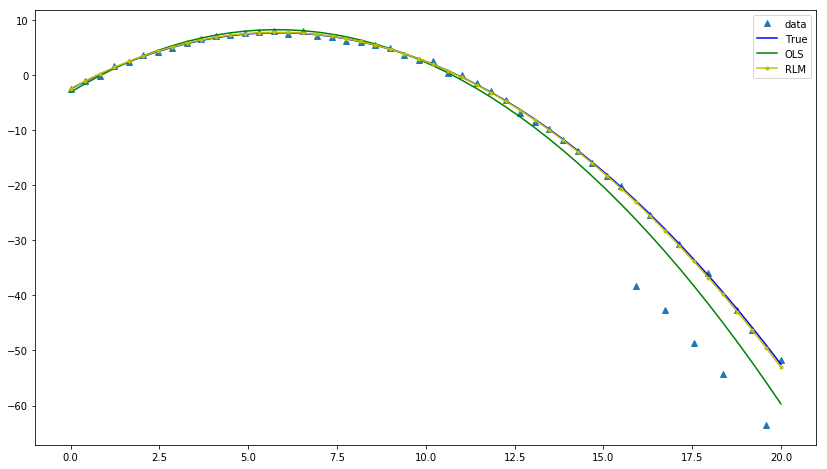

In [7]:
fig = plt.figure(figsize=(14, 8))

ax = fig.add_subplot(111)
ax.plot(x, y, '^',label="data")
ax.plot(x, y_true, 'b-', label="True")

ax.plot(x, results_ols.fittedvalues, 'g-', label="OLS")

ax.plot(x, results_rlm.fittedvalues, 'y.-', label="RLM")

ax.legend(loc="best")

We see that the OLS curve (the one is green) moves away from the actual data plot (shown in blue).
From the curvature of the lines in the above plot, we see that outliers have caused a shift in the OLS estimate, towards the outliers. 